In [11]:
len(housing[housing['total_bedrooms'].isna()==True])

207

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


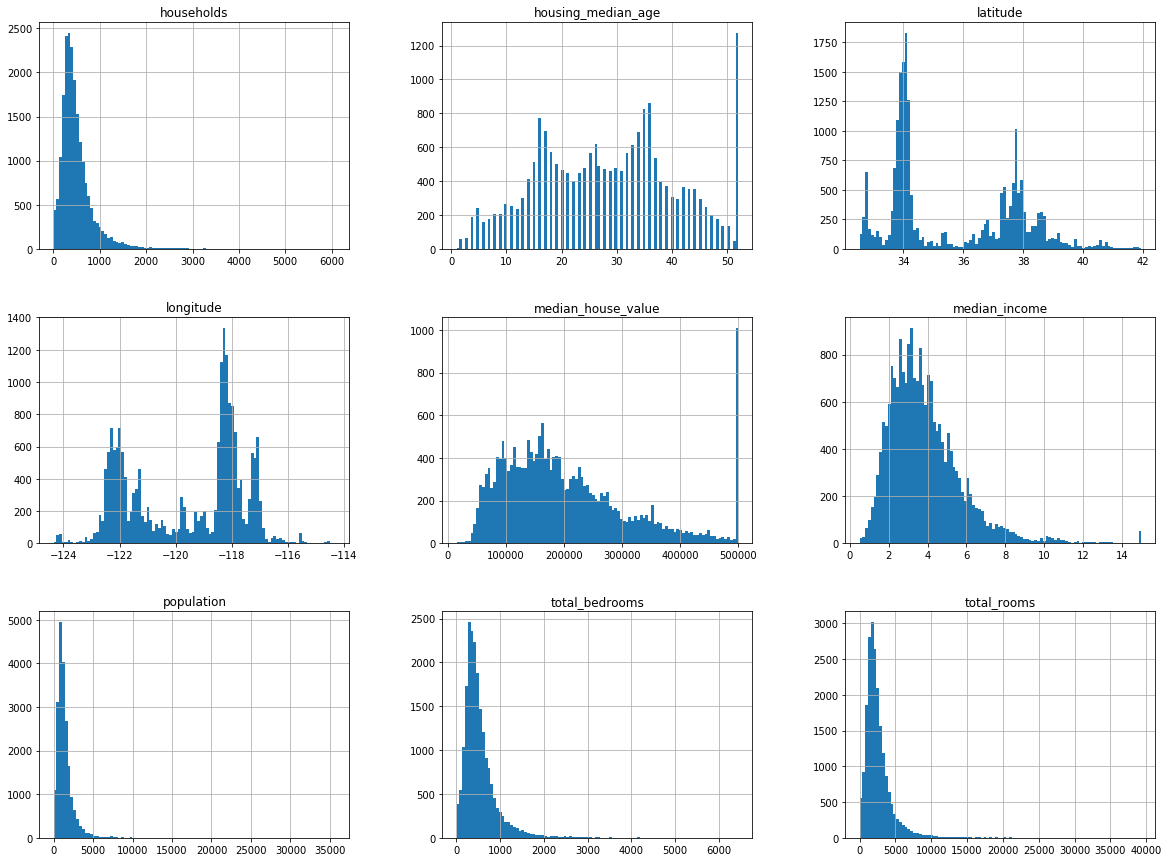

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

housing=pd.read_csv(r'C:\Users\Menda Jawahar\Desktop\housing.csv')
%matplotlib inline
housing.info()

housing.hist(bins=100,figsize=(20,15))
plt.show()

In [67]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,2.0


In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    train_set=housing.loc[train_index]
    test_set=housing.loc[test_index]

In [4]:
housing.income_cat.value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

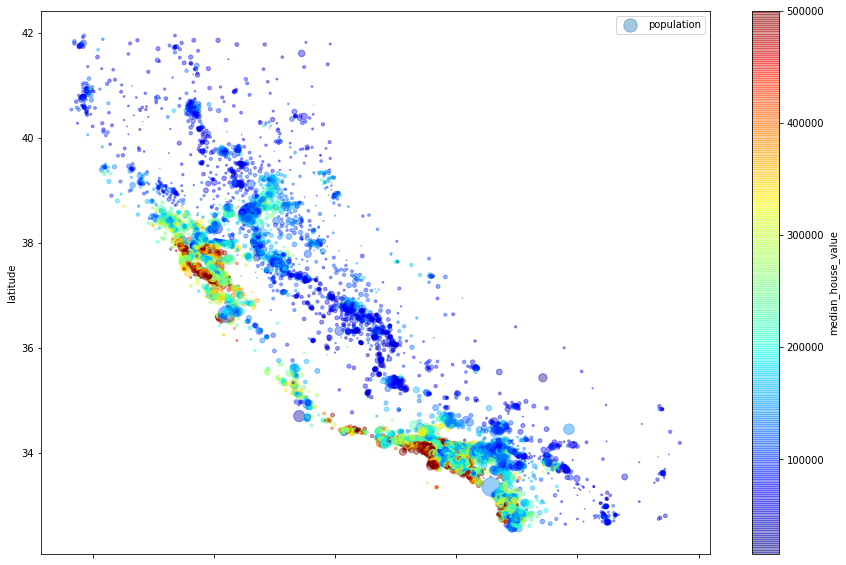

In [5]:
housing.plot(kind='scatter',x='longitude',y='latitude',figsize=(15,10),alpha=0.4,
s=housing["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [6]:
corr_matrix=housing.corr()
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
income_cat            0.643892
Name: median_house_value, dtype: float64

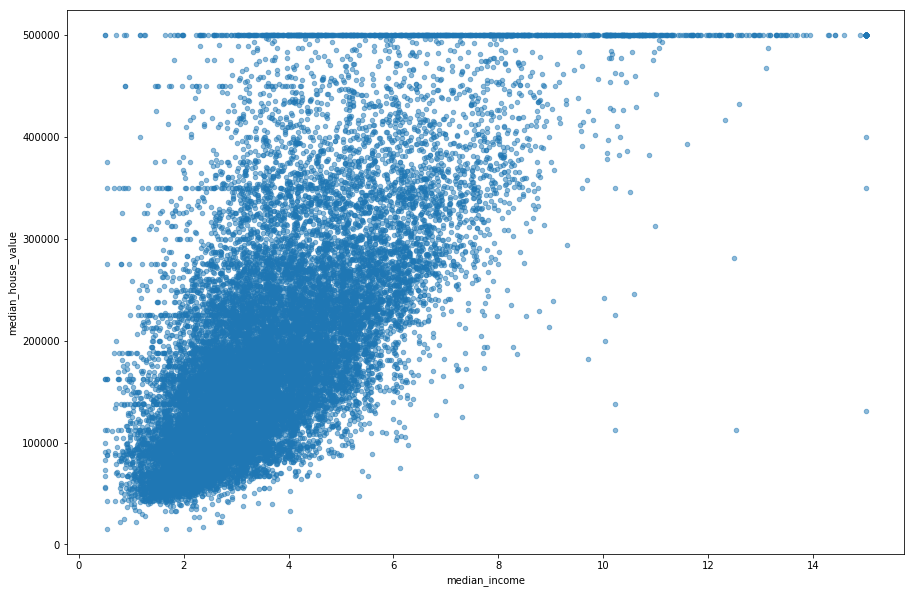

In [7]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.5,figsize=(15,10))

In [36]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy='median')
housing_num=housing.drop(['ocean_proximity'],axis=1)
imputer.fit(housing_num)
imputer.statistics_
x=imputer.transform(housing_num)
housing_tr=pd.DataFrame(x,columns=housing_num.columns)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit_transform(housing['ocean_proximity'])
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer(sparse_output=True)
encoder.fit_transform(housing['ocean_proximity'])

<20640x5 sparse matrix of type '<class 'numpy.int32'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [9]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


In [2]:
from sklearn.preprocessing import Imputer

In [3]:
i=Imputer(strategy='median')

In [7]:
i.fit_transform(housing.drop(['ocean_proximity'],axis=1))

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [8]:
i.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [11]:
housing.drop(['ocean_proximity'],axis=1).median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,LabelBinarizer

In [100]:
labelencoder=LabelEncoder()
onehotencoder=OneHotEncoder()
labelbinarizer=LabelBinarizer()

In [101]:
column_encoded=housing['ocean_proximity']

In [102]:
encoder=labelencoder.fit_transform(column_encoded)

In [103]:
encoder=onehotencoder.fit_transform(encoder.reshape(-1,1))

In [104]:
arr=encoder.toarray()

In [105]:
arr.shape

(20640, 5)

In [37]:
encoder.shape

(20640, 5)

In [38]:
l=[]
for i in range(12):
    l.append(i)

In [39]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [41]:
from numpy import array

In [42]:
array(l)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [43]:
data = [[11, 22],
        [33, 44],
        [55, 66]]

In [45]:
d=array(data)

In [51]:
d[1][1]

44

In [120]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([('imputer',Imputer(strategy="median")),
                       ('std_scaler',StandardScaler()),])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [111]:
housing_num=housing.drop(['ocean_proximity'],axis=1)

In [121]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [17]:
d1.toarray()

array([[1.]])